# Extraction of keywords from descriptions of glass diapositives

This notebook was created as part of an internship at the department of digitisation at the KU Leuven. The internship focuses on a collection glass diapositives with largely Egyptological and archaeological content. In this notebook, natural language processing (NLP) is used to extract keywords from the titles and subtitles of these slides; to be able to add them as structured data when uploading to Wikidata and Wikimedia Commons. 

As the dataset is large, consisting of a total of 3485 records, a test was performed on a small number of records. This test was performed before data cleaning in OpenRefine but nonetheless is already an important guideline for further work on the subject. 

To start with, the test dataset was created as a .CSV file. A small test was done, focusing on the data present in the first ten rows of the subtitle column instead of all the information present in the dataset. The subtitle column was chosen above the title as it often contains more descriptive information.

In [57]:
#use of pandas which can work well with tabular data such as .CSV files 
#change import and output file format later to .CSV 
import pandas as pd 

df = pd.read_excel('keyword_ext_test.xlsx')
#do not change original file but add changes to new .xlsx file 
df_keyword = df.to_excel('ext_keyword_text.xlsx')

#General description of test dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MMS ID                   119 non-null    int64 
 1   DIANUMMER                119 non-null    object
 2   Unnamed: 2               119 non-null    object
 3   TENEO                    119 non-null    object
 4   PRIMO                    119 non-null    object
 5   Hoofdtitel               119 non-null    object
 6   Ondertitel               106 non-null    object
 7   Stroming/Stijl           118 non-null    object
 8   Creatie/Bouw             119 non-null    object
 9   Techniek/Materiaal       69 non-null     object
 10  Oorspronkelijke locatie  75 non-null     object
 11  Huidige locatie          104 non-null    object
 12  Noot                     26 non-null     object
dtypes: int64(1), object(12)
memory usage: 12.2+ KB


,MMS ID,DIANUMMER,Unnamed: 2,TENEO,PRIMO,Hoofdtitel,Ondertitel,Stroming/Stijl,Creatie/Bouw,Techniek/Materiaal,Oorspronkelijke locatie,Huidige locatie,Noot
0,9992118915401488,PRECA GDE000001 box 001,IE2840544,TENEO,PRIMO,Dendur. Tempel van Dendur,Pronaos,Romeinse kunst,c. 15 BC,Zandsteen,"Nubië, Dendur","United States, New York, Metropolitan Museum o...",Museum ID: 68.154
1,9992118915301488,PRECA GDE000002 box 001,IE2840551,TENEO,PRIMO,Medamud. Tempel van Montu,"Man en twee kinderen, zittend voor de zuilen v...","Egyptische kunst, Griek-Romeinse periode",c. 2de eeuw BC,Kalksteen (?),"Egypte, Medamud",NaN,NaN
2,9992118915201488,PRECA GDE000003 box 001,IE2840558,TENEO,PRIMO,Medamud. Tempel van Montu,Oostelijk portaal van de noordelijke kiosk,"Egyptische kunst, Griek-Romeinse periode",c. 1ste eeuw BC,Kalksteen (?),"Egypte, Medamud",NaN,NaN
3,9992118915101488,PRECA GDE000004 box 001,IE2840565,TENEO,PRIMO,Medamud. Tempel van Montu,Oostelijk portaal van de noordelijke kiosk,"Egyptische kunst, Griek-Romeinse periode",c. 1ste eeuw BC,Kalksteen (?),"Egypte, Medamud",NaN,NaN
4,9992118915001488,PRECA GDE000005 box 001,IE2840572,TENEO,PRIMO,Medamud. Tempel van Montu,Noordelijke kiosk,"Egyptische kunst, Griek-Romeinse periode",c. 1ste eeuw BC,Kalksteen (?),"Egypte, Medamud",NaN,NaN


In [33]:
df['Ondertitel']

0                                               Pronaos
1     Man en twee kinderen, zittend voor de zuilen v...
2            Oostelijk portaal van de noordelijke kiosk
3            Oostelijk portaal van de noordelijke kiosk
4                                     Noordelijke kiosk
                            ...                        
94    Rechterhoek van de latei van Sesostris III:  S...
95    Kleine latei van Sesostris III. Laagreliëf: Ti...
96    Rechterhoek van de latei van Sesostris III:  S...
97       Latei van Sesostris III. Laagreliëf: Sed-feest
98    Architraven van Sesostris III, met het oosteli...
Name: Ondertitel, Length: 99, dtype: object

# Preprocessing

Before keyword extraction can occur, preprocessing the subtitle column is necessary. Starting from tokenization where word boundaries are marked so a list of individual words is achieved. Tokenization is not always straightforward, and descriptions also contain punctuation marks or other things which need to be filtered out. As the goal is to get a list of keywords from the data present in the subtitle column, stopwords need to be deleted and sentence detection should be carried out. Further filtering is most likely required to optimize the results achieved.

Secondly, to avoid having a large number of words to describe a similar keyword, which is easy to imagine for verbs, lemmatization is applied so different forms of a word are recognised to be the same. 

(1) Expand Contractions <br>
(2) Tokenization <br>
(3) Converting all characters to lowercase <br>
(4) Remove punctuation <br>
(5) Romve stopwords <br>
(6) Normalization | Lemmatization <br>

In [34]:
#import necessary modules and functions and download libraries needed 

# import nltk
# import string
# import contractions 
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords, wordnet
# from nltk.stem import WordNetLemmatizer 

# #nltk.download('punkt')
# #nltk.download('stopwords')
# #nltk.download('averaged_perceptron_tagger')
# #nltk.download('wordnet')

# #Expand contractions and save as new column - output: list words
# df['no_contractions'] = df['Ondertitel'].apply(lambda x:[contractions.fix(word) for word in x.split()])

# #Tokenization: divide sentences in words, first convert no_contraction back to list format to do this
# df['no_contractions_str'] = [' '.join(map(str, l)) for l in df['no_contractions']]
# df['tokenized'] = df['no_contractions_str'].apply(word_tokenize)

# #Conversion of all characters to lowercase using for loop
# df['lowercase'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])

# #Removal of punctuation using for loop and in condition on alpha character
# punc = string.punctuation
# df['no_punctuation'] = df['lowercase'].apply(lambda x: [word for word in x if word not in punc])

# #Removal of stopwords which do not add any meaning for our project. Import NLTK stopwords library, set to Dutch 
# #using for loop - only keep those words that do not occur in list stopwords
# stop_words = set(stopwords.words('dutch'))
# df['no_stopwords'] = df['no_punctuation'].apply(lambda x: [word for word in x if word not in stop_words])
# df['no_stopwords']

#Lemmatization - group inflected forms word to analyze as single word - use speech tags 
# df['speech_tags'] = df['no_stopwords'].apply(nltk.tag.pos_tag)
# df['speech_tags']

# # #Convert speech tags to wordnet format, by defining function

# # def get_wordnet_pos(tag): 
# #     if tag.startswith('J'):
# #         return wordnet.ADJ
# #     elif tag.startswith('V'):
# #         return wordnet.VERB
# #     elif tag.startswith('N'):
# #         return wordnet.NOUN
# #     elif tag.startswith('R'): 
# #         return wordnet.ADV
# #     else: 
# #         return wordnet.NOUN
    
# df['wordnet_tags'] = df['speech_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# # #Use WordNetLemmatizer() within list comprehension
# wnl = WordNetLemmatizer()
# df['lemmatized'] = df['wordnet_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# df['lemmatized']

In [35]:
# import simplemma 
# langdata = simplemma.load_data('nl')
# #simplemma does seem to work for dutch but not as well for verbs 

# df['lemmatized'] = df['no_stopwords'].apply(lambda x: [simplemma.lemmatize(word, langdata) for word in x])
# df['lemmatized']
    


Better results using spacy for Dutch language? - crucial to have good output
as it will also influence the results that can be achieved in the next steps <br>
since we are working with Dutch data, pick NLP module most suitable for this, first tried NLTK and simplemma but results insufficient; shift to **spaCy**


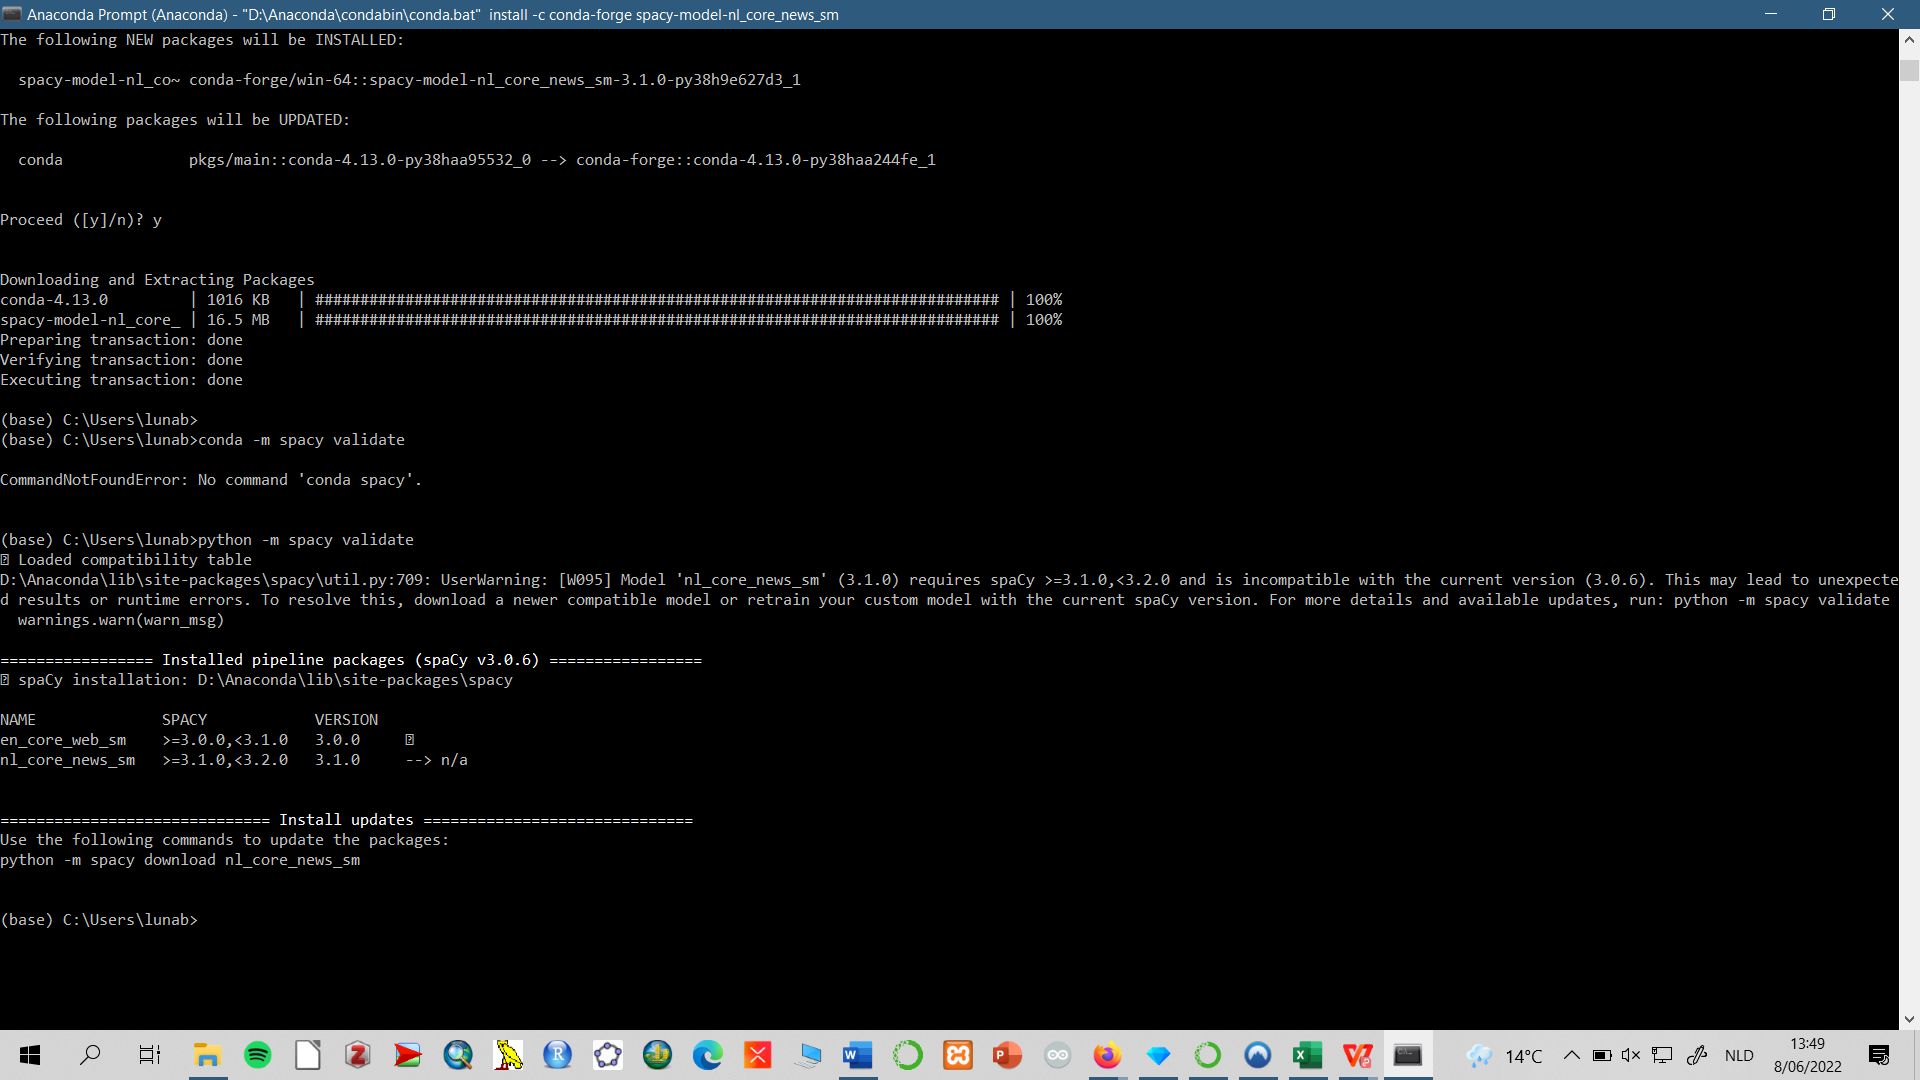

use of **'conda install -c conda-forge spacy-model-nl_core_news_sm'** to install, worked but error: ConfigValidationError: 

**Config validation error**

ner -> incorrect_spans_key   extra fields not permitted

{'nlp': <spacy.lang.nl.Dutch object at 0x0000021FECDE9730>, 'name': 'ner', 'incorrect_spans_key': None, 'model': {'@architectures': 'spacy.TransitionBasedParser.v2', 'state_type': 'ner', 'extra_state_tokens': False, 'hidden_width': 64, 'maxout_pieces': 2, 'use_upper': True, 'nO': None, 'tok2vec': {'@architectures': 'spacy.Tok2Vec.v2', 'embed': {'@architectures': 'spacy.MultiHashEmbed.v2', 'width': 96, 'attrs': ['NORM', 'PREFIX', 'SUFFIX', 'SHAPE'], 'rows': [5000, 2500, 2500, 2500], 'include_static_vectors': False}, 'encode': {'@architectures': 'spacy.MaxoutWindowEncoder.v2', 'width': 96, 'depth': 4, 'window_size': 1, 'maxout_pieces': 3}}}, 'moves': None, 'update_with_oracle_cut_size': 100, '@factories': 'ner'}

Check by **'python -m spacy validate'** to see which versions are used -> not compatible so install necessary updates!

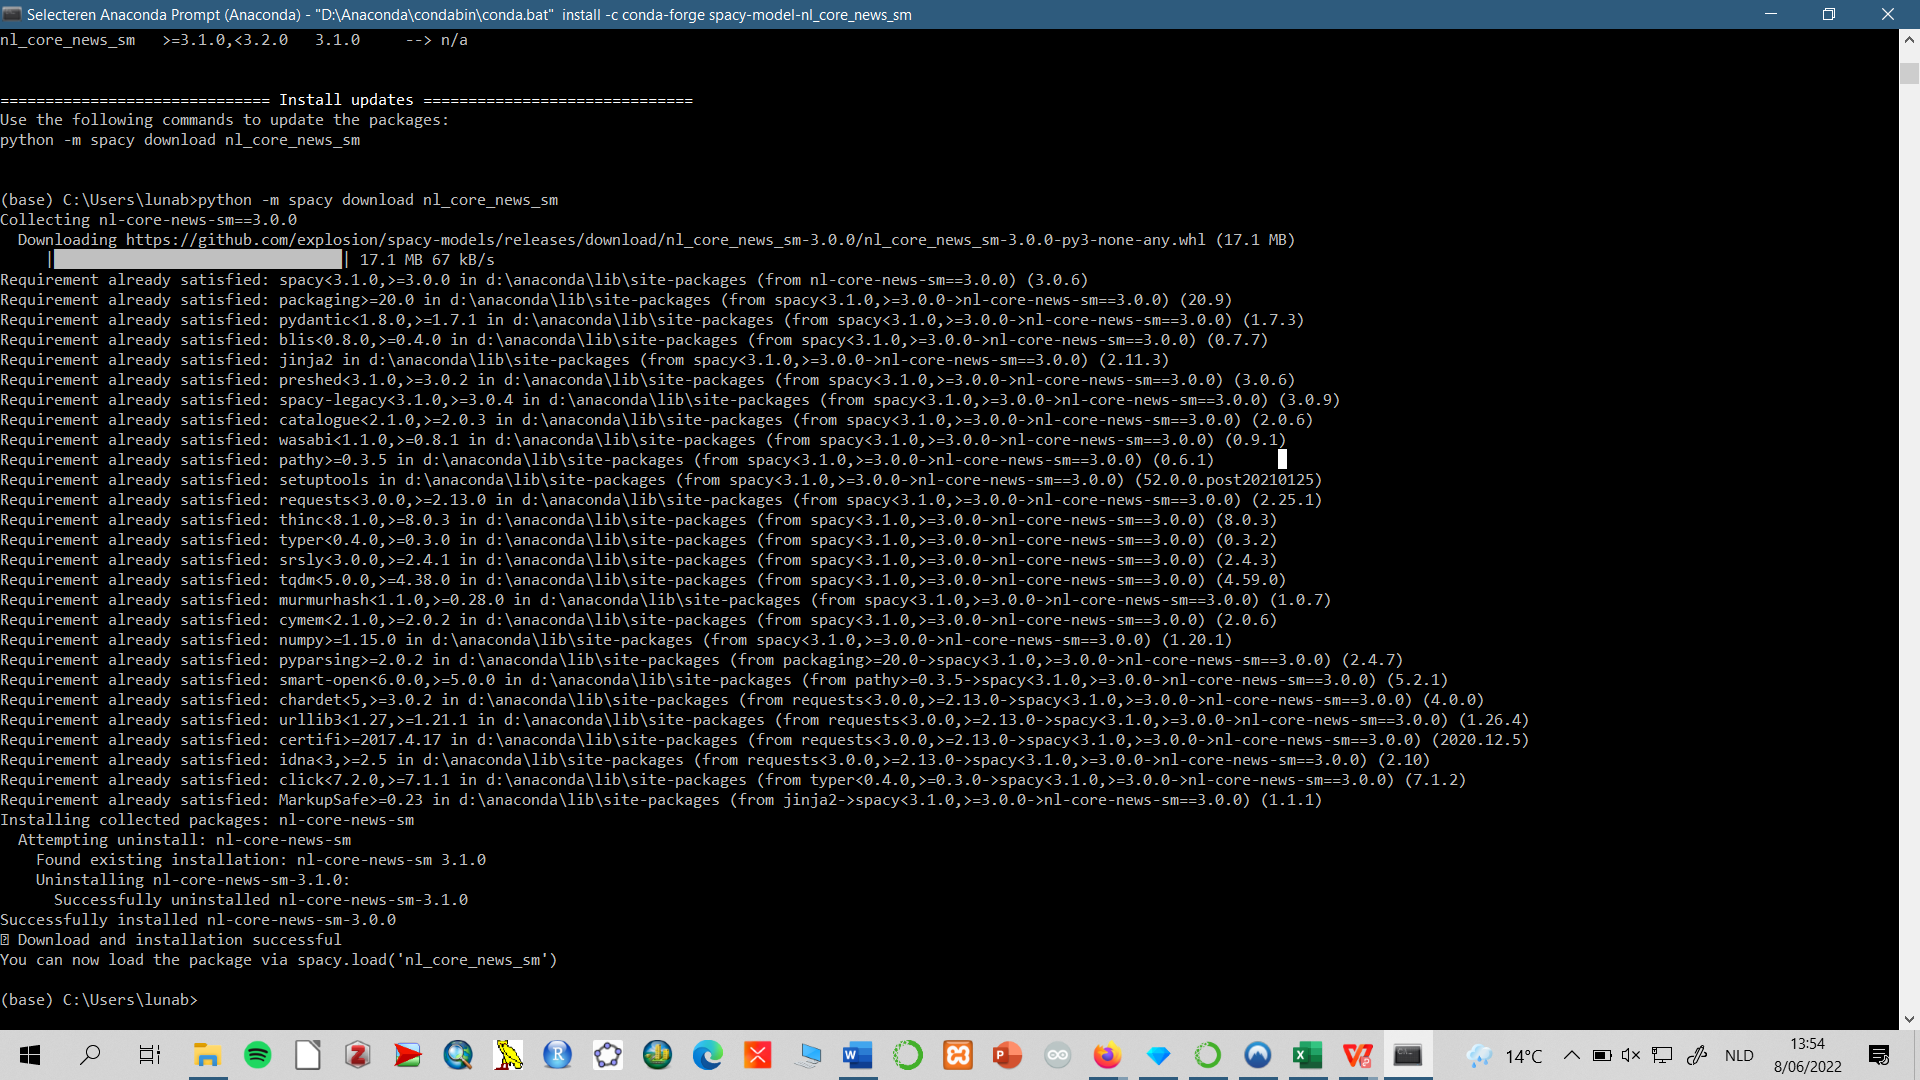

In [36]:
test_string = 'twee archeologen rusten al zittend uit: aan de zuidelijke kant van de tempel. De tempel van Karnak heeft veel mooie reliëfs waaronder die van de godheid Bes en de godin Montu. In het Louvre, Parijs bevinden zich een hele reeks beelden met afbeeldingen van deze godheden, daterend uit de 18de dynastie (Toetanchamon).'

#if this works better, give some more information on why choice for sm version (and not md_lg)

import spacy
nlp = spacy.load('nl_core_news_sm')
                                                  
doc = nlp(test_string)
tokens = [[token.text, token.lemma_] for token in doc]
print(tokens)

[['twee', 'twee'], ['archeologen', 'archeoloog'], ['rusten', 'rusten'], ['al', 'al'], ['zittend', 'zitten'], ['uit', 'uit'], [':', ':'], ['aan', 'aan'], ['de', 'de'], ['zuidelijke', 'zuidelijk'], ['kant', 'kant'], ['van', 'van'], ['de', 'de'], ['tempel', 'tempel'], ['.', '.'], ['De', 'de'], ['tempel', 'tempel'], ['van', 'van'], ['Karnak', 'karnak'], ['heeft', 'hebben'], ['veel', 'veel'], ['mooie', 'mooi'], ['reliëfs', 'reliëf'], ['waaronder', 'waaronder'], ['die', 'die'], ['van', 'van'], ['de', 'de'], ['godheid', 'godheid'], ['Bes', 'bes'], ['en', 'en'], ['de', 'de'], ['godin', 'godin'], ['Montu', 'montu'], ['.', '.'], ['In', 'in'], ['het', 'het'], ['Louvre', 'louvre'], [',', ','], ['Parijs', 'parijs'], ['bevinden', 'bevinden'], ['zich', 'zich'], ['een', 'een'], ['hele', 'heel'], ['reeks', 'reeks'], ['beelden', 'beeld'], ['met', 'met'], ['afbeeldingen', 'afbeelding'], ['van', 'van'], ['deze', 'deze'], ['godheden', 'godheid'], [',', ','], ['daterend', 'dateren'], ['uit', 'uit'], ['de', 

In [37]:
#instead of using one string, apply to test dataset 

df['token_spacy'] = df['Ondertitel'].apply(lambda x: [token.lemma_ for token in nlp(x)])
#remove stopwords
df['no_stopwords_spacy'] = df['Ondertitel'].apply(lambda x: [token.lemma_ for token in nlp(x) if token.is_stop == False])
#remove punctuation and make lowercase 
df['no_punc_spacy'] = df['Ondertitel'].apply(lambda x: [token.lemma_.lower() for token in nlp(x) if token.is_stop == False and token.text.isalpha() == True])
print(df['no_punc_spacy'])


0                                             [pronaos]
1              [man, twee, kind, zitten, zuil, portico]
2               [oostelijk, portaal, noordelijk, kiosk]
3               [oostelijk, portaal, noordelijk, kiosk]
4                                   [noordelijk, kiosk]
                            ...                        
94     [rechterhoek, latei, sesostris, iii, laagreliëf]
95    [klein, latei, sesostris, iii, laagreliëf, tit...
96     [rechterhoek, latei, sesostris, iii, laagreliëf]
97                  [latei, sesostris, iii, laagreliëf]
98    [architraven, sesostris, iii, oostelijk, porta...
Name: no_punc_spacy, Length: 99, dtype: object


When comparing the result between the use of NLTK and simplemma or the use of spaCy for the lemmatization of Dutch words, the latter seems to have the most reliable results. Therefore, it was decided that spaCy will be used for further analysis of the test dataset.

**delete columns not necessary anymore from nltk**

In [38]:
#Part-of-Speech Tagging (POS) that defines functionality word in document 
df['speech_tags_spacy'] = df['Ondertitel'].apply(lambda x: [[token.lemma_.lower(), token.pos_] for token in nlp(x) if token.is_stop == False and token.text.isalpha() == True])
print(df['speech_tags_spacy'])

0                                    [[pronaos, PROPN]]
1     [[man, PROPN], [twee, NUM], [kind, NOUN], [zit...
2     [[oostelijk, ADJ], [portaal, NOUN], [noordelij...
3     [[oostelijk, ADJ], [portaal, NOUN], [noordelij...
4                    [[noordelijk, ADJ], [kiosk, NOUN]]
                            ...                        
94    [[rechterhoek, NOUN], [latei, NOUN], [sesostri...
95    [[klein, ADJ], [latei, NOUN], [sesostris, PROP...
96    [[rechterhoek, NOUN], [latei, NOUN], [sesostri...
97    [[latei, NOUN], [sesostris, PROPN], [iii, PROP...
98    [[architraven, PROPN], [sesostris, PROPN], [ii...
Name: speech_tags_spacy, Length: 99, dtype: object


In [39]:
#named entity-recognition (NER): identify word-describing elements such as places, people, organisations, and languages
from spacy import displacy

entities = [(i, i.label_, i.label) for i in doc.ents]
print(entities)
displacy.render(doc, style='ent', jupyter=True)

[(twee, 'CARDINAL', 397), (Karnak, 'GPE', 384), (Montu, 'PERSON', 380), (Louvre, 'FAC', 9191306739292312949), (Parijs, 'GPE', 384), (18de, 'ORDINAL', 396), (Toetanchamon, 'PERSON', 380)]


In [45]:
#use of larger dataset (per column)
#NER uses Doc object to work with while column of our dataframe are Series
#this needs to be converted first - can be done through nlp(x)
#https://spacy.io/api/doc 

test_str = 'Rechterhoek van de latei van Sesostris III:  Sed-feest in laagreliëf'
test_doc = nlp(test_str)
displacy.render(test_doc, style='ent', jupyter=True)

#NO RESULTS WHEN APPLYING NER ON CLEANED DATA, BUT WHEN ADDING ONE OF THE SUBTITLES, IT DOES RETURN SOMETHING
#DOES IT NEED CLEANED DATA OR DOES NER NEED STRUCTURE SENTENCES TO BE PRESERVED TO BE ABLE TO SEE
#WHAT WORDS ARE ENTITIES OF A CERTAIN TYPE? 

df['no_punc_spacy_str'] = [' '.join(map(str, l)) for l in df['no_punc_spacy']]
df['ner_subtitle'] = df['no_punc_spacy_str'].apply(lambda x: [[ent.text, ent.start_char, ent.end_char, ent.label_] for ent in nlp(x).ents])

df['ner_subtitle'].value_counts()


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                          97
[[twee, 0, 4, CARDINAL]]     1
[[twee, 4, 8, CARDINAL]]     1
Name: ner_subtitle, dtype: int64

In [77]:
#try again but start from subtitle column itself? 
df['ner_subtitle_original_text'] = df['Ondertitel'].apply(lambda x: [[ent.text, ent.start_char, ent.end_char, ent.label_] for ent in nlp(x).ents])
df['ner_subtitle_original_text'].value_counts()

#to be able to render it in the same way as above, need to convert pandas series
#['ner_subtitle_original_text'] to dictionary; KeyError: 'text'

# ner_subtitle_dict = df.set_index('ner_subtitle_original_text').to_dict('list')

# displacy.render(ner_subtitle_dict, style='ent', jupyter=True, manual=True)


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                        20
[[Sesostris III, 33, 46, PERSON]]                                                                                          5
[[Fernand Bisson, 13, 27, PERSON], [la Roque, 31, 39, EVENT], [Amenemhat Sobekhotep, 60, 80, PERSON]]                      3
[[Detail, 32, 38, PERSON]]                                                                                                 3
[[Latei van Sesostris III, 0, 23, PERSON]]                                                                                 3
[[Amenemhat Sobekhotep, 51, 71, PERSON]]                                                                                   2
[[Sesostris III, 35, 48, PERSON]]                                                                                          2
[[Nijlgoden, 35, 44, GPE]]                                                                                                 2


As the results above are not ideal, with "twee jongens poseren bij laagreliëf in" being recognised as a date and numerous other errors occurring, introducing these results into the dataset would result in a large error margin. Therefore, the choice was made to use a translation service whereafter the Dandelion API for named entity recognition could be used through OpenRefine.

In [3]:
"""set GOOGLE_APPLICATION_CREDENTIALS=619e66d1101bfd9f237952ffccd80fa07889ea4f
def translate_text(target, text):
    #Translates text into the target language.

    #Target must be an ISO 639-1 language code.
    #See https://g.co/cloud/translate/v2/translate-reference#supported_languages

    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print(u"Text: {}".format(result["input"]))
    print(u"Translation: {}".format(result["translatedText"]))
    print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))

translate_text("en", "Twee jongens zitten op een kameel voor de tempel van Seti I")"""



SyntaxError: invalid syntax (2004456236.py, line 1)

As several errors occured during the use of the Google Translate API, the choice was made to instead work with the Python translators library.

In [62]:
import translators as ts
phrase = 'Twee jongens zitten op een kameel voor de tempel van Seti I'

ts.google(phrase, from_language='nl', to_language='en')
#check for string types in dataframe
#[ col  for col, dt in df.dtypes.items() if dt == object]
df['Ondertitel'] = df['Ondertitel'].drop(labels=range(15, 45), axis=0)
df.fillna('', inplace=True)

df['Ondertitel']
df['translated_subtitles'] = df['Ondertitel'].apply(lambda x: ts.google(x, from_language='nl', to_language='en'))

In [63]:
df['translated_subtitles']

0                                                Pronaos
1      Man and two children, sitting in front of the ...
2                   Eastern portal of the northern kiosk
3                   Eastern portal of the northern kiosk
4                                         Northern kiosk
5        Southern kiosk. Relief: procession of musicians
6      Archaeologists and workers investigate the flo...
7           Southern kiosk. Line drawing relief: singers
8                        Southern kiosk. Relief: singers
9      Southern kiosk. Line drawing relief: hieroglyp...
10          Southern kiosk. Line drawing Relief: God Bes
11     Southern kiosk. Line drawing relief: processio...
12                 Workers pull the brick to the surface
13     Fernand Bisson de la Roque and workers investi...
14                                                Kiosks
15                                                      
16                                                      
17                             

In [51]:
print(df['Ondertitel'])
print(df['Ondertitel'].str.len().sum()) # error because limit is 5000 per time!
print(df['Ondertitel'].dtype)
print(df['Hoofdtitel'].dtype)

1      Man en twee kinderen, zittend voor de zuilen v...
2             Oostelijk portaal van de noordelijke kiosk
3             Oostelijk portaal van de noordelijke kiosk
4                                      Noordelijke kiosk
5      Zuidelijke kiosk. Reliëf: Processie van muzika...
6      Archeologen en arbeiders onderzoeken de vloer ...
7      Zuidelijke kiosk. Lijntekening reliëf: Zangere...
8                  Zuidelijke kiosk. Reliëf: Zangeressen
9      Zuidelijke kiosk. Lijntekening reliëf: Hiërogl...
10        Zuidelijke kiosk. Lijntekening reliëf: God Bes
11     Zuidelijke kiosk. Lijntekening reliëf: Process...
12        Arbeiders trekken deksteen naar de oppervlakte
13     Fernand Bisson de la Roque en arbeiders onderz...
14                                               Kiosken
45           Arbeider poseert bij poort van Amenhotep II
46                   Pilaar van Amenhotep III in schoren
47         Arbeiders schoren de pilaar van Amenhotep III
48     Arbeider naast latei met

KeyError: 'Ondertitel'

In [21]:
pd.set_option("display.max_rows", None)

df['translated_subtitles']

0                               Dendur. Temple of Dendur
1                               Medamud. Temple of Montu
2                               Medamud. Temple of Montu
3                               Medamud. Temple of Montu
4                               Medamud. Temple of Montu
5                               Medamud. Temple of Montu
6                               Medamud. Temple of Montu
7                               Medamud. Temple of Montu
8                               Medamud. Temple of Montu
9                               Medamud. Temple of Montu
10                              Medamud. Temple of Montu
11                              Medamud. Temple of Montu
12                              Medamud. Temple of Montu
13                              Medamud. Temple of Montu
14                              Medamud. Temple of Montu
15                              Medamud. Temple of Montu
16                              Medamud. Temple of Montu
17                             

In [23]:
df['translated_titles'] = df['Hoofdtitel'].apply(lambda x: ts.google(x, from_language='nl', to_language='en'))
df['translated_titles']

0                               Dendur. Temple of Dendur
1                               Medamud. Temple of Montu
2                               Medamud. Temple of Montu
3                               Medamud. Temple of Montu
4                               Medamud. Temple of Montu
5                               Medamud. Temple of Montu
6                               Medamud. Temple of Montu
7                               Medamud. Temple of Montu
8                               Medamud. Temple of Montu
9                               Medamud. Temple of Montu
10                              Medamud. Temple of Montu
11                              Medamud. Temple of Montu
12                              Medamud. Temple of Montu
13                              Medamud. Temple of Montu
14                              Medamud. Temple of Montu
15                              Medamud. Temple of Montu
16                              Medamud. Temple of Montu
17                             